<a href="https://colab.research.google.com/github/nandivardhan522/PyTorch-Totorial/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [3]:
# Convert MNIST Image files into a Tensor of 4-dimensions(# of images, height, width, color)
transform = transforms.ToTensor()

In [4]:
#Train data
train_data = datasets.MNIST(root='cnn_data', train=True, download=True, transform=transform)

100%|██████████| 9.91M/9.91M [00:01<00:00, 5.48MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 161kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.52MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.09MB/s]


In [5]:
#Test data
test_data = datasets.MNIST(root='cnn_data', train=False, download=True, transform=transform)

In [6]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [7]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [13]:
# create a small batch size for images
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [14]:
# Define our CNN here
# Describe convolution layer and what it's doing (2 convoultional layers)
# This is just an example
conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, stride=1)
conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, stride=1)

In [15]:
#grab 1 mnist record/image
for i, (X_train, y_train) in enumerate(train_data):
    break

In [16]:
X_train.shape

torch.Size([1, 28, 28])

In [17]:
x=X_train.view(1,1,28,28)

In [18]:
# Perform our first convolution NN
x=F.relu(conv1(x))

In [19]:
x.shape

torch.Size([1, 6, 26, 26])

In [20]:
#let's pass through the poooling layer
x= F.max_pool2d(x,2,2)

In [21]:
x.shape

torch.Size([1, 6, 13, 13])

In [23]:
# do our second cnn
x = F.relu(conv2(x))
x.shape

torch.Size([1, 16, 11, 11])

In [24]:
x= F.max_pool2d(x,2,2)
x.shape

torch.Size([1, 16, 5, 5])

In [26]:
#Model class
class CNNModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,6,3,1)
        self.conv2 = nn.Conv2d(6,16,3,1)
        # Fully connected layer
        self.fc1 = nn.Linear(5*5*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 5*5*16)

        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

In [27]:
#create an instance for our model
torch.manual_seed(41)
model = CNNModel()
model

CNNModel(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [28]:
# Loss function optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [29]:
import time
start_time = time.time()
# variables to track
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1

        # Apply the model
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


        if b%100 == 0:
          print(f'epoch: {i}  batch: {b} loss: {loss.item()}')
    train_losses.append(loss)
    train_correct.append(trn_corr)

    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            y_val = model(X_test)
            predicted = torch.max(y_val.data, 1)[1]

            tst_corr += (predicted == y_test).sum()
        loss = criterion(y_val, y_test)
        test_losses.append(loss)
        test_correct.append(tst_corr)

current_time = time.time()
elapsed_time = current_time - start_time
print(elapsed_time/60,' minutes')

epoch: 0  batch: 100 loss: 0.9812231063842773
epoch: 0  batch: 200 loss: 0.43812650442123413
epoch: 0  batch: 300 loss: 0.28931525349617004
epoch: 0  batch: 400 loss: 0.08598048985004425
epoch: 0  batch: 500 loss: 0.33633095026016235
epoch: 0  batch: 600 loss: 0.1623610556125641
epoch: 0  batch: 700 loss: 0.5226176977157593
epoch: 0  batch: 800 loss: 0.6974474191665649
epoch: 0  batch: 900 loss: 0.20160897076129913
epoch: 0  batch: 1000 loss: 0.5349848866462708
epoch: 0  batch: 1100 loss: 0.8624889254570007
epoch: 0  batch: 1200 loss: 0.1502392590045929
epoch: 0  batch: 1300 loss: 0.025196203961968422
epoch: 0  batch: 1400 loss: 0.3291054666042328
epoch: 0  batch: 1500 loss: 0.055179618299007416
epoch: 0  batch: 1600 loss: 0.05321278050541878
epoch: 0  batch: 1700 loss: 0.07852675765752792
epoch: 0  batch: 1800 loss: 0.4744560718536377
epoch: 0  batch: 1900 loss: 0.03948891535401344
epoch: 0  batch: 2000 loss: 0.5566567182540894
epoch: 0  batch: 2100 loss: 0.026368603110313416
epoch: 0

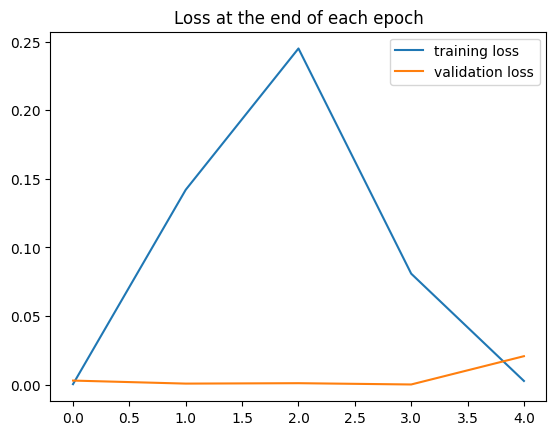

In [31]:
# graph the loss at each epoch
train_losses = [t.item() for t in train_losses]
test_losses = [t.item() for t in test_losses]
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend()

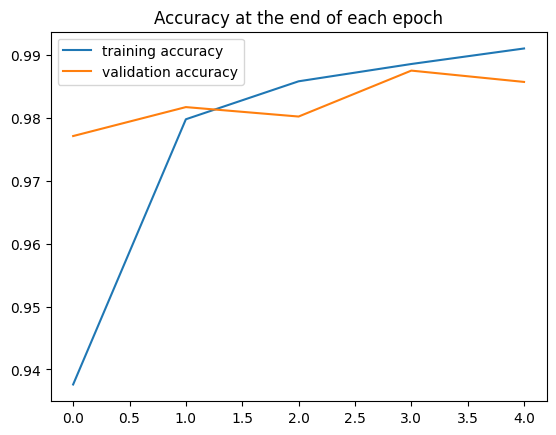

In [32]:
# graph the accuracy at the end of each epoch
train_accuracy = [t.item()/60000 for t in train_correct]
test_accuracy = [t.item()/10000 for t in test_correct]
plt.plot(train_accuracy, label='training accuracy')
plt.plot(test_accuracy, label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend()

In [33]:
test_load_everything = DataLoader(test_data, batch_size=10000, shuffle=False)

In [34]:
with torch.no_grad():
    correct = 0
    for b, (X_test, y_test) in enumerate(test_load_everything):
        y_val = model(X_test)
        predicted = torch.max(y_val.data, 1)[1]
        correct += (predicted == y_test).sum()
    print(f'Test accuracy: {correct.item()/10000}')

Test accuracy: 0.9857


In [35]:
test_data[4143]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [36]:
test_data[4143][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [37]:
test_data[4143][0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

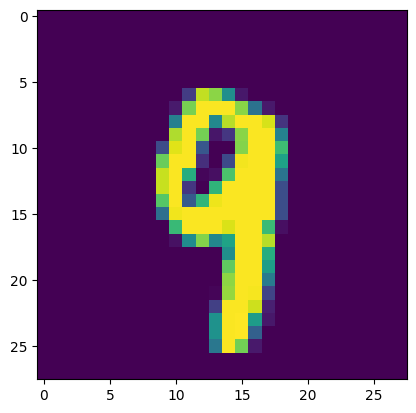

In [39]:
plt.imshow(test_data[4143][0].reshape(28,28))

In [40]:
#let's pass this image
model.eval()
with torch.no_grad():
  new_image = test_data[4143][0].view(1,1,28,28)
  y_pred = model(new_image)

In [44]:
y_pred.argmax()

tensor(9)